#### Laptop Configuration and Price Analysis Case Study

#### Context

Laptopia101 is an online laptop retailer with a wide range of products. Different types of customers have different requirements, and Laptopia101 wants to improve its website by including informative visuals regarding laptop configuration and prices to improve customer experience.

The original dataset can be viewed [here](https://www.kaggle.com/muhammetvarl/laptop-price).

#### Data Description

The data contains information about the model, manufacturer, price, and configuration of various laptops in the inventory of Laptopia101. The detailed data dictionary is given below.

**Data Dictionary**

- `Company`: Laptop Manufacturer
- `Product`: Brand and Model
- `TypeName`: Type (Notebook, Ultrabook, Gaming, etc.)
- `Inches`: Screen Size
- `ScreenResolution`: Screen Resolution
- `Cpu`: Central Processing Unit
- `Ram`: Laptop RAM
- `Memory`: Hard Disk / SSD Memory
- `GPU`: Graphics Processing Unit
- `OpSys`: Operating System
- `Weight`: Laptop Weight
- `Price_euros`: Price in euros

#### Import Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to handle regular expressions
import re

# to split the data into training and test sets
from sklearn.model_selection import train_test_split

# for one hot encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# to build the linear regression model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#### Import Dataset

In [2]:
# loading the dataset
df = pd.read_csv("data/15_laptop_price.csv", engine="python")

#### Explore the Data and Data Types

In [3]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 1303 rows and 13 columns.


In [4]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
644,652,Acer,Extensa EX2540,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,450.00
1275,1293,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
163,167,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1079.00
1008,1022,HP,ProBook 440,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64kg,1049.26
909,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.00
268,273,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,1018.00
1133,1148,HP,250 G6,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,752.00
983,997,Fujitsu,LifeBook A556,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.3kg,649.00
1277,1295,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
904,916,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,1962.99


In [5]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


- `laptop_ID` - Can be dropped as it seems to be a sequence number

- `Company`, `TypeName`, `OpSys` - Need to further check how many unique values are there, possibly convert into categorical variable

- `Product`, `Cpu`, `Gpu` - Need to further check if we can take out only first part into a new column 

- `Inches` - Numerical - okay

- `ScreenResolution` - Need to further check if we can split into new column

- `Ram`, `Memory`, - `Weight` - Convert into numerical column

- `Price_euros` - Numerical - Okay, Target Feature

In [6]:
# Drop laptop_ID as it is not useful for analysis
df.drop(columns=["laptop_ID"], inplace=True)

#### Checking for missing values

In [7]:
# checking for missing values
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

* There are no missing values in the data.

#### Statistical Summary

In [8]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1303,19,Dell,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1303,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1303,6,Notebook,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1303.0,NaN,NaN,NaN,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4
ScreenResolution,1303,40,Full HD 1920x1080,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,1303,9,8GB,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,1303,39,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,1303,110,Intel HD Graphics 620,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpSys,1303,9,Windows 10,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations

* There are 19 different laptop manufacturing companies in the data.
* There are over 600 different laptop models in the data.
* The screen size varies from 10.1 to 18.1 inches.
* The laptop prices vary from 174 to ~6100 euros.

#### Exploratory Data Analysis, Data Cleaning, Feature Engineering, Visualization

#### Univariate Analysis

In [9]:
# Function to plot count and percentage barplots side by side
def plot_count_and_percentage_barplot(data, column, figsize=(12, 5)):
    """
    Plots two countplots side by side: one with count labels, one with percentage labels.
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to plot.
        figsize (tuple): Figure size for the plots.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    categories = data[column].value_counts().index
    total = len(data)
    
    # Countplot with count labels
    ax1 = sns.countplot(data=data, x=column, hue=column, order=categories, ax=axes[0], palette='Set2')
    axes[0].set_title('Counts per ' + column)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)
    for p in ax1.patches:
        count = int(p.get_height())
        ax1.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    
    # Countplot with percentage labels
    ax2 = sns.countplot(data=data, x=column, hue=column, order=categories, ax=axes[1], palette='Set2')
    axes[1].set_title('Percentage per ' + column)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=90)
    for p in ax2.patches:
        percent = 100 * p.get_height() / total
        ax2.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='blue')
    
    plt.tight_layout()
    plt.show()

In [10]:
# Function to create a histogram and boxplot combined for visualization of numerical features
def histogram_boxplot(data, feature, figsize=(10, 5)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=True, ax=ax_hist2, color='skyblue')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

`Company` - Laptop Company Distribution

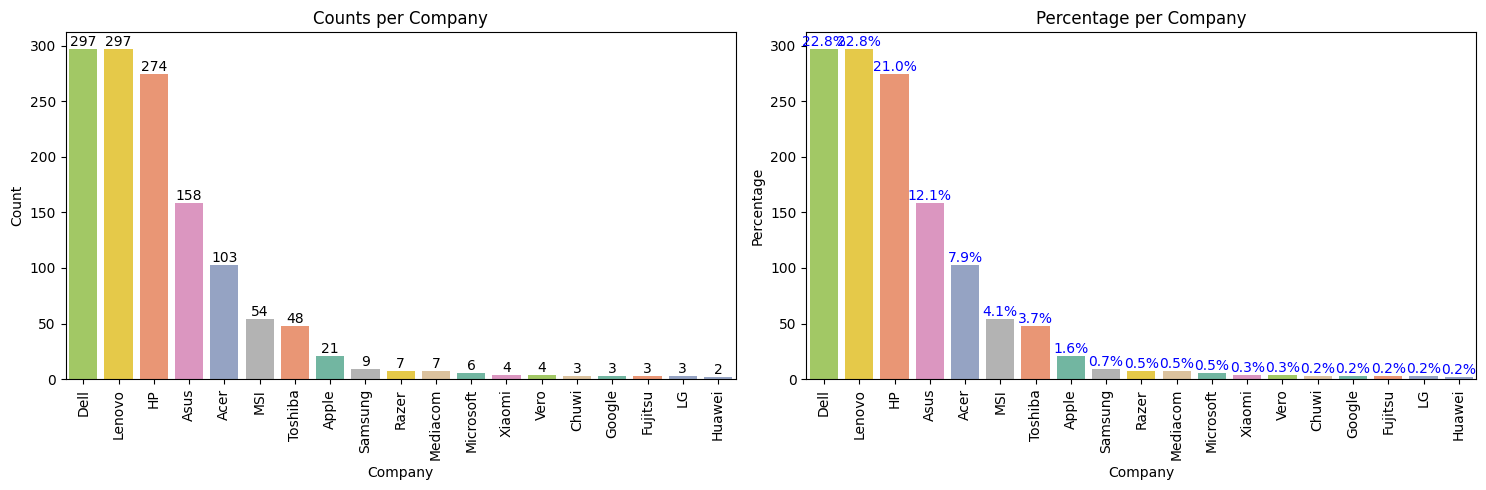

In [11]:
plot_count_and_percentage_barplot(df, "Company", figsize=(15, 5))

In [12]:
print(f'Top 5 Companies: {round(df['Company'].value_counts(normalize=True).nlargest(5).sum(),3)*100}')
print(f'Top 7 Companies: {round(df['Company'].value_counts(normalize=True).nlargest(7).sum(),3)*100}')

Top 5 Companies: 86.6
Top 7 Companies: 94.5


- *Top 5 companies - Dell, Lenovo, HP, Asus, Acer constitutes almost 86% of share, and Top 7 Companies constitutes almost 94.5%*
- *We will perform one hot encoding with top 5 Companies and remaining as 6th*

`TypeName` - Notebook, Ultrabook, Gaming distribution

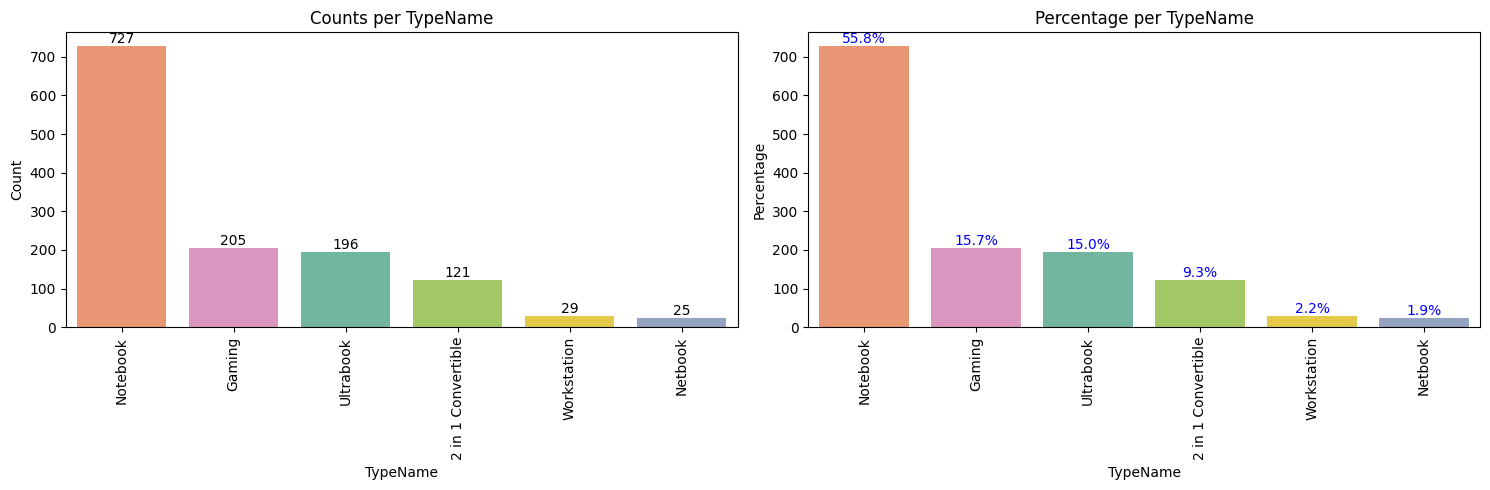

In [13]:
plot_count_and_percentage_barplot(df, "TypeName", figsize=(15, 5))

- *Notebook is dominant with 56%, followed by Gaming (16%) and Ultrabook (15%)*
- *We will perform one hot encoding and drop the domimant one*

`OpSys` - Operating System Distribution

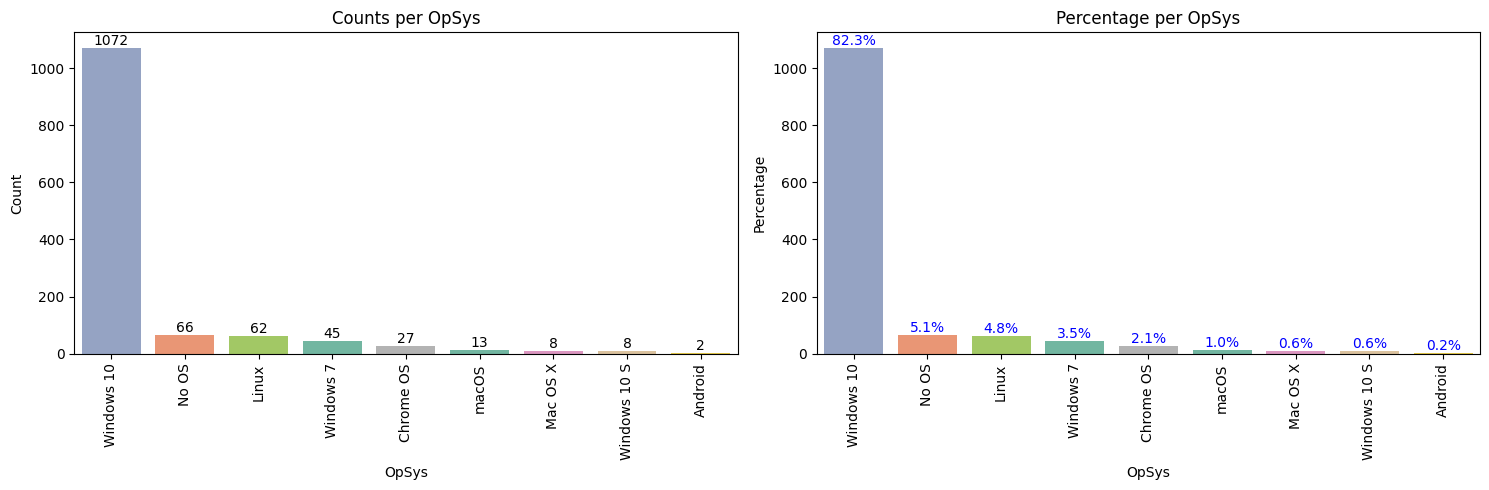

In [14]:
plot_count_and_percentage_barplot(df, "OpSys", figsize=(15, 5))

- *Majority are Windows 10 (82%), Data is highly imbalanced*
- *We will perform one hot encoding and drop the domimant one*


#### Convert following into Categories `Company`, `TypeName`, `OpSys`

In [15]:
# converting some columns to category datatype
cat_columns = ["Company", "TypeName", "OpSys"]

for col in cat_columns:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1303 non-null   category
 1   Product           1303 non-null   object  
 2   TypeName          1303 non-null   category
 3   Inches            1303 non-null   float64 
 4   ScreenResolution  1303 non-null   object  
 5   Cpu               1303 non-null   object  
 6   Ram               1303 non-null   object  
 7   Memory            1303 non-null   object  
 8   Gpu               1303 non-null   object  
 9   OpSys             1303 non-null   category
 10  Weight            1303 non-null   object  
 11  Price_euros       1303 non-null   float64 
dtypes: category(3), float64(2), object(7)
memory usage: 96.8+ KB


`Price_euros` distribution

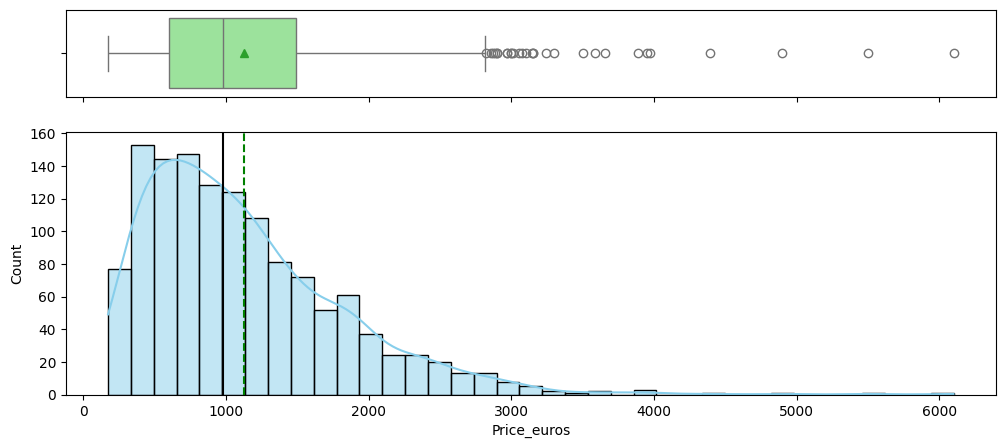

In [16]:
histogram_boxplot(df, "Price_euros", figsize=(12, 5))

- *Price is right skewed with few outliers*

`Inches` distribution

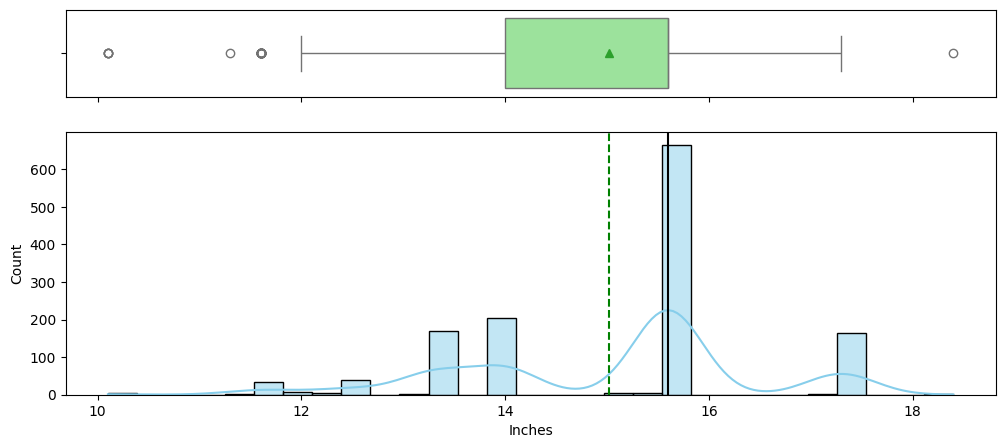

In [17]:
histogram_boxplot(df, "Inches", figsize=(12, 5))

In [18]:
df.Inches.value_counts(normalize=True)

Inches
15.6    0.510361
14.0    0.151190
13.3    0.125863
17.3    0.125863
12.5    0.029931
11.6    0.025326
12.0    0.004605
13.5    0.004605
13.9    0.004605
12.3    0.003837
10.1    0.003070
15.4    0.003070
15.0    0.003070
13.0    0.001535
18.4    0.000767
17.0    0.000767
14.1    0.000767
11.3    0.000767
Name: proportion, dtype: float64

In [19]:
print(f'Top 5 Sizes: {round(df['Inches'].value_counts(normalize=True).nlargest(5).sum(),3)*100}')

Top 5 Sizes: 94.3


- *Top 5 sizes constitute almost 94 of the data*

Lets take care of `Ram`, `Memory` and `Weight`

In [20]:
# lets check all the Ram is expressed in GB
df.Ram.str.endswith('GB').all()

np.True_

*We can see all the `Ram` ends with GB

In [21]:
df.Ram = df.Ram.str.replace("GB", "").astype(int)

*Lets take care of Memory*

In [22]:
# Lets check Memory
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

*Its not following a pattern, so we are going to leave as is, and before running the model, we'll drop Memory*

In [23]:
# We can extract few of the items

import re

def classify_storage(entry):
    entry = str(entry).lower()

    # Define regex patterns
    ssd_pattern = r'\bssd\b'
    hdd_pattern = r'\bhdd\b'
    flash_pattern = r'\bflash\b'
    hybrid_pattern = r'\bhybrid\b'

    has_ssd = re.search(ssd_pattern, entry)
    has_hdd = re.search(hdd_pattern, entry)
    has_flash = re.search(flash_pattern, entry)
    has_hybrid = re.search(hybrid_pattern, entry)

    # Classification logic
    if has_flash:
        return 'Flash'
    elif has_hybrid or (has_ssd and has_hdd):
        return 'Hybrid'
    elif has_ssd:
        return 'SSD'
    elif has_hdd:
        return 'HDD'
    else:
        return 'Unknown'


df['Storage_Type'] = df.Memory.apply(classify_storage)

In [24]:
df.Storage_Type.value_counts()

Storage_Type
SSD       641
HDD       375
Hybrid    212
Flash      75
Name: count, dtype: int64

*This looks good, lets convert into Category*

In [25]:
# converting Storage_Type to category
df.Storage_Type = df.Storage_Type.astype("category")

*Extracting Memory Size*

In [26]:
def extract_total_size(entry):
    entry = str(entry).lower()
    total_size = 0

    # Find all matches like "256gb", "1tb", "1.0tb", etc.
    matches = re.findall(r'(\d+\.?\d*)\s*(gb|tb)', entry)

    for size, unit in matches:
        size = float(size)
        if unit == 'tb':
            size *= 1000  # Convert TB to GB
        total_size += size

    return int(total_size)

df['Total_Memory_Size'] = df['Memory'].apply(extract_total_size)


In [27]:
df.Total_Memory_Size.value_counts()

Total_Memory_Size
256     420
1000    247
500     132
512     122
1128     94
128      81
1256     74
32       45
2000     19
64       16
1512     15
2256     10
16       10
180       5
2512      3
756       2
2128      2
1024      1
768       1
1064      1
240       1
8         1
508       1
Name: count, dtype: int64

In [28]:
# Removing the original Memory column
df.drop(columns=["Memory"], inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   Product            1303 non-null   object  
 2   TypeName           1303 non-null   category
 3   Inches             1303 non-null   float64 
 4   ScreenResolution   1303 non-null   object  
 5   Cpu                1303 non-null   object  
 6   Ram                1303 non-null   int64   
 7   Gpu                1303 non-null   object  
 8   OpSys              1303 non-null   category
 9   Weight             1303 non-null   object  
 10  Price_euros        1303 non-null   float64 
 11  Storage_Type       1303 non-null   category
 12  Total_Memory_Size  1303 non-null   int64   
dtypes: category(4), float64(2), int64(2), object(5)
memory usage: 98.3+ KB


*Looks good*

In [30]:
# Lets look at Weight column now
df.Weight.str.endswith('kg').all()

np.True_

*All of weight is expressed as Kg, so we can remove the suffix Kg*

In [31]:
df.Weight = df.Weight.str.replace("kg", "").astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   Product            1303 non-null   object  
 2   TypeName           1303 non-null   category
 3   Inches             1303 non-null   float64 
 4   ScreenResolution   1303 non-null   object  
 5   Cpu                1303 non-null   object  
 6   Ram                1303 non-null   int64   
 7   Gpu                1303 non-null   object  
 8   OpSys              1303 non-null   category
 9   Weight             1303 non-null   float64 
 10  Price_euros        1303 non-null   float64 
 11  Storage_Type       1303 non-null   category
 12  Total_Memory_Size  1303 non-null   int64   
dtypes: category(4), float64(3), int64(2), object(4)
memory usage: 98.3+ KB


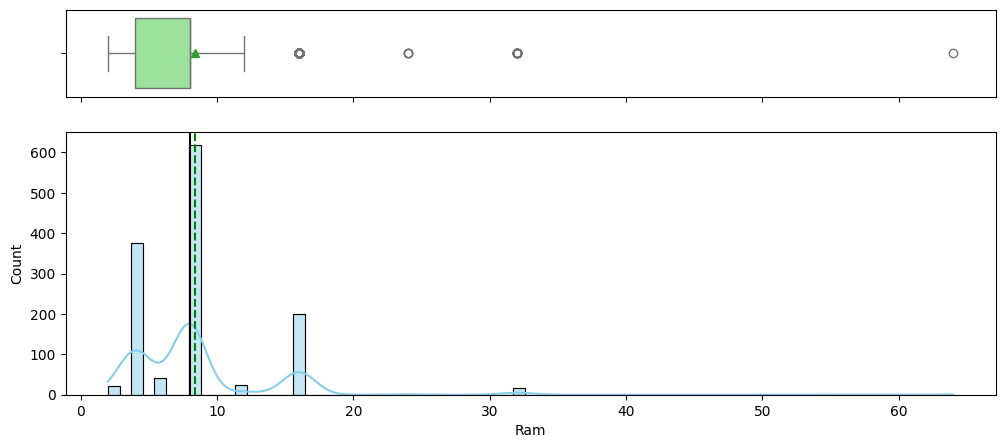

In [33]:
# lets look at the distribution of Ram and Weight
histogram_boxplot(df, "Ram", figsize=(12, 5))

*Most of the Ram is 8GB*

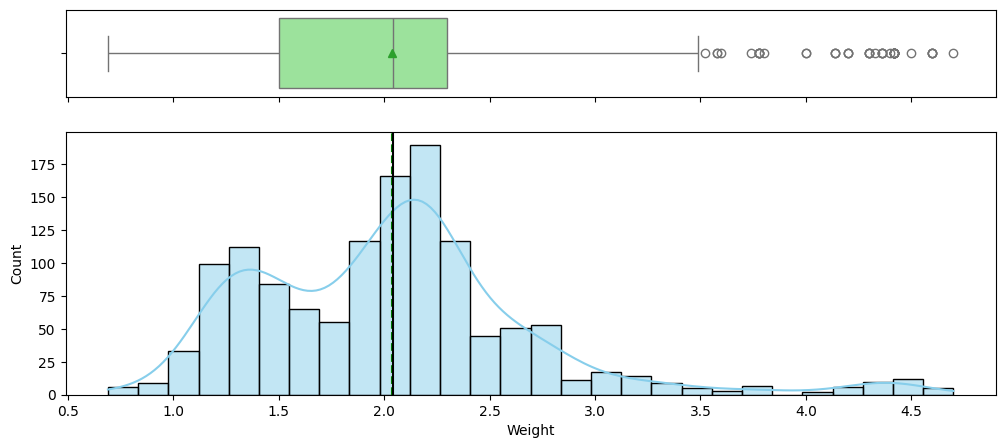

In [34]:
histogram_boxplot(df, "Weight", figsize=(12, 5))

*Mean and Median weight is 2Kg. There are few devices which are greater than 3.5 kg*

`Product` Lets look at Product to see if we can just keep the Product and get rid of model # 

In [35]:
df["Sub_Product"] = df.Product.str.split().str[0]

In [36]:
df.Product.nunique()

618

*There are still 226 Products. Lets see who has most Products*

In [37]:
df.groupby("Company")["Sub_Product"].nunique().sort_values(ascending=False).head(10)

Company
Asus        65
HP          63
MSI         32
Lenovo      22
Acer        16
Dell         8
Vero         4
Toshiba      4
Mediacom     3
Chuwi        2
Name: Sub_Product, dtype: int64

In [38]:
# don't think Sub_Product is useful as there are too many unique values, lets drop it
df.drop(columns=["Sub_Product"], inplace=True)

`Cpu` Lets see what we can do with Cpu

In [39]:
# Lets look at 'Cpu' column
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel 

In [40]:
# lets take first part of Cpu and see if that is useful
df["Cpu_Brand"] = df.Cpu.str.split().str[0]
df.Cpu_Brand.value_counts()

Cpu_Brand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [41]:
# convert Cpu_Brand to category
df.Cpu_Brand = df.Cpu_Brand.astype("category")

In [42]:
# Lets try to take first 2 parts of Cpu
df["Cpu_Model"] = df.Cpu.str.split().str[0:2].str.join(" ")
df.Cpu_Model.value_counts()

Cpu_Model
Intel Core        1105
Intel Celeron       88
Intel Pentium       30
AMD A9-Series       17
Intel Atom          13
AMD A6-Series       11
AMD E-Series         9
AMD A12-Series       8
AMD A10-Series       6
AMD Ryzen            4
Intel Xeon           4
AMD A8-Series        4
AMD FX               2
AMD A4-Series        1
Samsung Cortex       1
Name: count, dtype: int64

*Cpu_Model doesn't look very useful as categorical variable, lets drop it*

In [43]:
# dropping Cpu_Model as it doesn't look very useful
df.drop(columns=["Cpu_Model"], inplace=True)

In [44]:
# dropping Cpu column as we have extracted useful information from it
df.drop(columns=["Cpu"], inplace=True)

`Gpu` - Lets see what can be done with Gpu

In [45]:
# Lets look at the Gpu column
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620             281
Intel HD Graphics 520             185
Intel UHD Graphics 620             68
Nvidia GeForce GTX 1050            66
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               43
AMD Radeon 530                     41
Intel HD Graphics 500              39
Intel HD Graphics 400              37
Nvidia GeForce GTX 1070            30
Intel HD Graphics                  29
Nvidia GeForce GTX 1050 Ti         28
AMD Radeon R5 M430                 22
Nvidia GeForce 930MX               20
AMD Radeon 520                     17
Nvidia GeForce MX150               15
Intel HD Graphics 515              15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Nvidia GeForce GTX 960M            14
Nvidia GeForce 920MX               13
Intel HD Graphics 505              12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Intel HD Graphics 405               9
Nvidia Quadro M1200                 9
AMD Rade

In [46]:
# Lets take first part of Gpu
df["Gpu_Brand"] = df.Gpu.str.split().str[0]

In [47]:
df.Gpu_Brand.value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

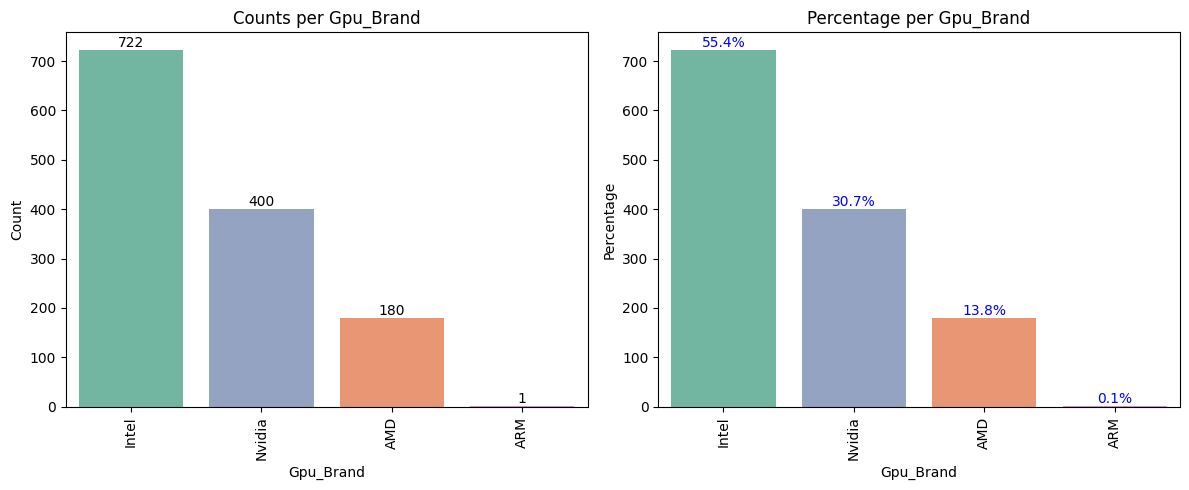

In [48]:
plot_count_and_percentage_barplot(df, "Gpu_Brand", figsize=(12, 5))

In [49]:
# convert Gpu_Brand to category datatype
df.Gpu_Brand = df.Gpu_Brand.astype("category")

In [50]:
# drop Gpu column
df.drop(columns=["Gpu"], inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   Product            1303 non-null   object  
 2   TypeName           1303 non-null   category
 3   Inches             1303 non-null   float64 
 4   ScreenResolution   1303 non-null   object  
 5   Ram                1303 non-null   int64   
 6   OpSys              1303 non-null   category
 7   Weight             1303 non-null   float64 
 8   Price_euros        1303 non-null   float64 
 9   Storage_Type       1303 non-null   category
 10  Total_Memory_Size  1303 non-null   int64   
 11  Cpu_Brand          1303 non-null   category
 12  Gpu_Brand          1303 non-null   category
dtypes: category(6), float64(3), int64(2), object(2)
memory usage: 80.8+ KB


In [52]:
df.sample(15, random_state=2)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Storage_Type,Total_Memory_Size,Cpu_Brand,Gpu_Brand
248,HP,ProBook 430,Notebook,13.3,IPS Panel Full HD 1920x1080,4,Windows 10,1.49,675.0,HDD,500,Intel,Intel
556,Mediacom,SmartBook 130,Notebook,13.3,IPS Panel Full HD 1920x1080,4,Windows 10,1.35,255.0,Flash,32,Intel,Intel
693,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Touchscreen 2560x1440,8,Windows 10,1.42,2590.0,SSD,256,Intel,Intel
387,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,8,Windows 10,2.23,1369.0,HDD,500,Intel,AMD
781,Asus,Rog G752VS-BA171T,Gaming,17.3,IPS Panel Full HD 1920x1080,16,Windows 10,4.30,2350.0,Hybrid,1256,Intel,Nvidia
379,Acer,Aspire 7,Notebook,15.6,Full HD 1920x1080,8,Linux,2.40,846.0,HDD,1000,Intel,Nvidia
716,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,8,Windows 10,1.90,1179.0,SSD,256,Intel,Intel
880,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,4,Windows 10,1.28,1700.0,SSD,256,Intel,Intel
654,HP,250 G6,Notebook,15.6,1366x768,4,No OS,1.86,364.9,HDD,500,Intel,Intel
994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,8,Windows 10,1.68,889.0,SSD,256,Intel,Intel


#### Lets take care of 'ScreenResolution`

In [53]:
# extract the screen resolution
df['ScrResolution'] = df.ScreenResolution.str.split(" ").str[-1]

df[["ScrResolution", "ScreenResolution"]].head()

,ScrResolution,ScreenResolution
0,2560x1600,IPS Panel Retina Display 2560x1600
1,1440x900,1440x900
2,1920x1080,Full HD 1920x1080
3,2880x1800,IPS Panel Retina Display 2880x1800
4,2560x1600,IPS Panel Retina Display 2560x1600


In [54]:
df.ScrResolution = df.ScrResolution.str.split("x").str[0].astype(int)
df.ScrResolution.value_counts()

ScrResolution
1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: count, dtype: int64

In [55]:
# lets drop ScreenResolution column
df.drop(columns=["ScreenResolution"], inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   Product            1303 non-null   object  
 2   TypeName           1303 non-null   category
 3   Inches             1303 non-null   float64 
 4   Ram                1303 non-null   int64   
 5   OpSys              1303 non-null   category
 6   Weight             1303 non-null   float64 
 7   Price_euros        1303 non-null   float64 
 8   Storage_Type       1303 non-null   category
 9   Total_Memory_Size  1303 non-null   int64   
 10  Cpu_Brand          1303 non-null   category
 11  Gpu_Brand          1303 non-null   category
 12  ScrResolution      1303 non-null   int64   
dtypes: category(6), float64(3), int64(3), object(1)
memory usage: 80.8+ KB


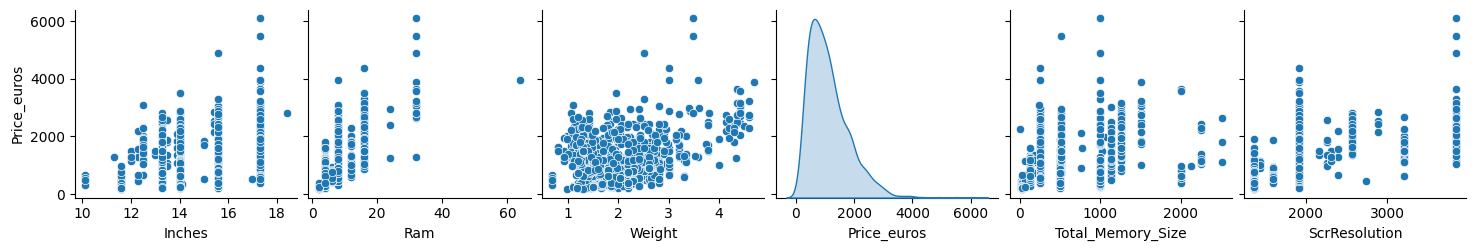

In [57]:
# lets look at pairplot to see how numerical features are related to Price_euros
sns.pairplot(df,y_vars=["Price_euros"], diag_kind="kde");

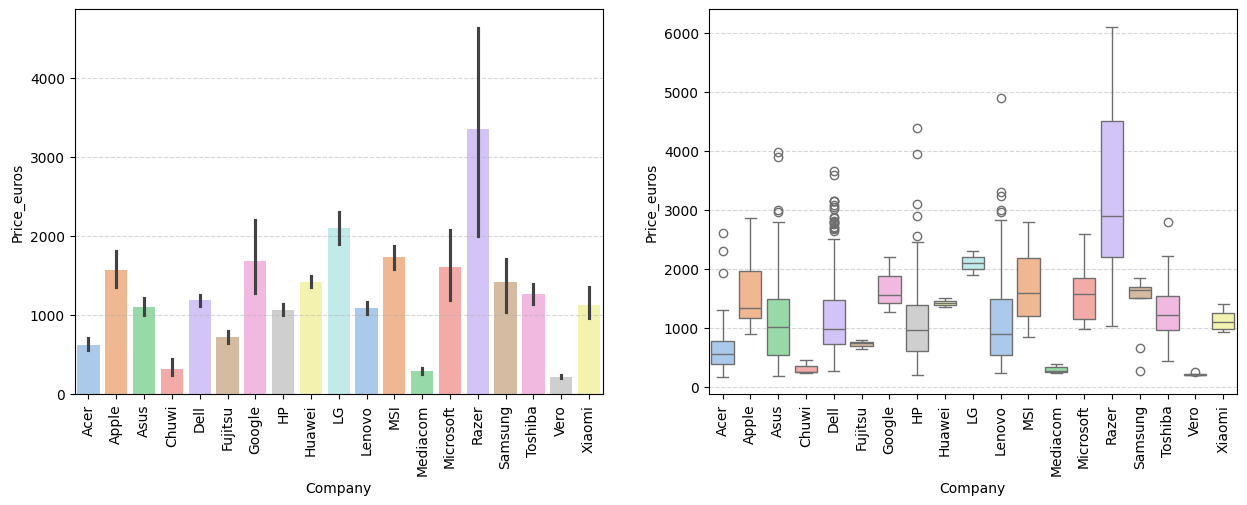

In [58]:
# Comparing Price vs Company

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Price_euros", x="Company", palette='pastel')
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Price_euros", x="Company", palette='pastel')
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

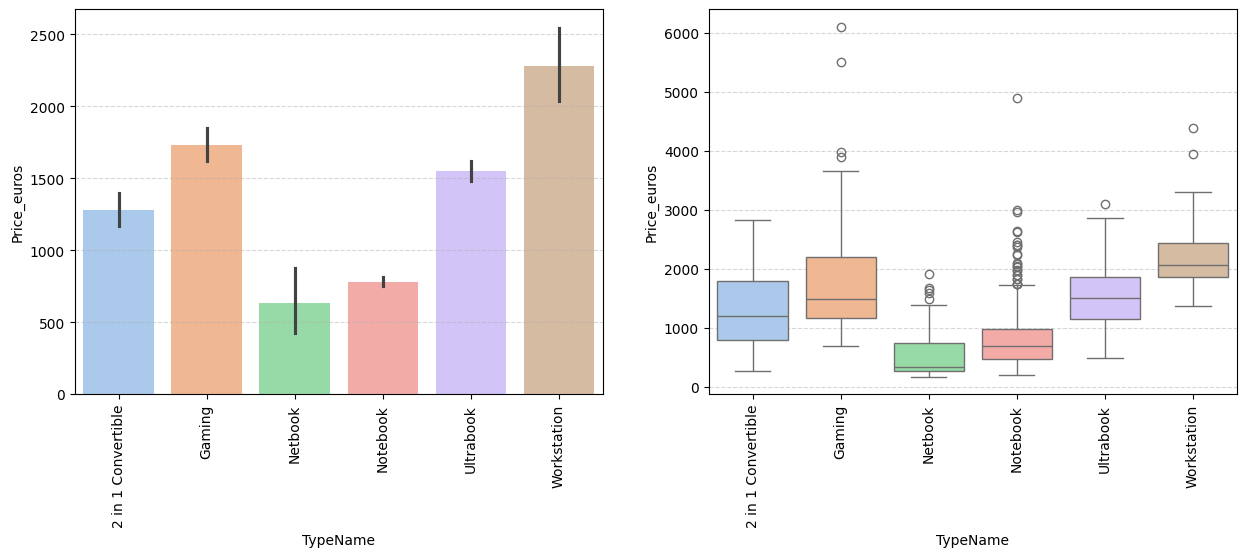

In [59]:
# Comparing Price vs TypeName

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Price_euros", x="TypeName", palette='pastel')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Price_euros", x="TypeName", palette='pastel')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


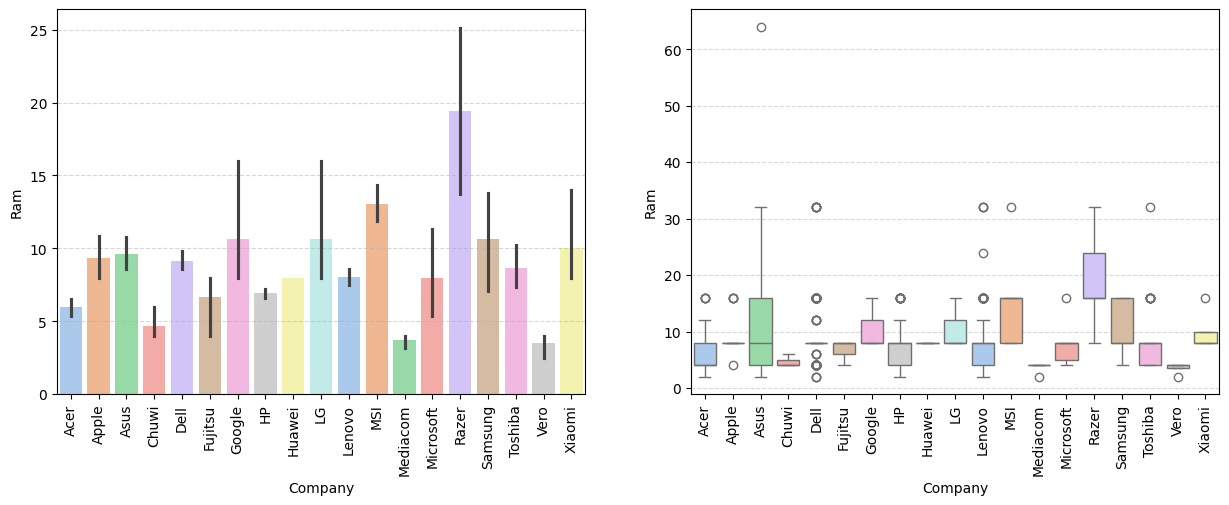

In [60]:
# Comparing Ram vs Company

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Ram", x="Company", palette='pastel')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Ram", x="Company", palette='pastel')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

#### Lets Perform Linear Regression

In [61]:
# drop Product column as it has too many unique values
df.drop(columns=["Product"], inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   TypeName           1303 non-null   category
 2   Inches             1303 non-null   float64 
 3   Ram                1303 non-null   int64   
 4   OpSys              1303 non-null   category
 5   Weight             1303 non-null   float64 
 6   Price_euros        1303 non-null   float64 
 7   Storage_Type       1303 non-null   category
 8   Total_Memory_Size  1303 non-null   int64   
 9   Cpu_Brand          1303 non-null   category
 10  Gpu_Brand          1303 non-null   category
 11  ScrResolution      1303 non-null   int64   
dtypes: category(6), float64(3), int64(3)
memory usage: 70.6 KB


In [63]:
# categorical columns for one hot encoding
categorical_cols = ['Company', 'TypeName', 'OpSys', 'Storage_Type', 'Cpu_Brand', 'Gpu_Brand']

# split features and target variable

X = df.drop(columns=["Price_euros"])
y = df.Price_euros

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# one hot encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays to DataFrames
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Drop original categorical columns and concatenate encoded ones
X_train_final = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)

In [64]:
# perform linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Model performance check

We will be using metric functions defined in sklearn for RMSE, MAE, and R<superscript>2</superscript>

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
.

In [65]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # R-squared - Proportion of the variance in the dependent variable that is predictable from the independent variables
    r2 = r2_score(target, pred)  # to compute R-squared

    # Adj. R-squared - Adjusted R-squared adjusts the statistic based on the number of predictors in the model
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    
    # RMSE - Root Mean Squared Error - Square root of the average of the squared errors between predicted and actual values
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    
    # MAE - Mean Absolute Error - Average of the absolute errors between predicted and actual values
    mae = mean_absolute_error(target, pred)  # to compute MAE
    
    # MAPE - Mean Absolute Percentage Error - How far off your predictions are, on average, in percentage terms
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [66]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lr_model, X_train_final, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,331.43343,241.56575,0.772665,0.762632,24.886945


In [67]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lr_model, X_test_final, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,359.417749,253.999036,0.74567,0.693862,26.579949


#### Observations

* `R-Squared` Trainging 0.772665; Test 0.74567; Slight increase on test set is expected; model generalizes fairly well.
* `Adj. R-Squared` Training 0.7626; Test 0.6939; Slightly larger drop, possibly due to model complexity vs. test set variability.
* `RMSE` Slight increase on test set is expected, model generalizes fairly well
* `MAE` Training 241.57; Test 254.00; Very close—low error drift, which is a good sign.
* `MAPE` Training 24.89%; Test 26.58%; Acceptable increase; still within a reasonable error margin.